<h4>Import Libraries</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE  

<h3> Step 1: Data Loading and Initial Exploration </h3>

In [2]:
# Load the dataset
data = pd.read_csv("diabetes_binary_classification_data.csv")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(data.head())

# Check the structure and information of the dataset
print("\nDataset Info:")
data.info()

# Get summary statistics of the numerical columns
print("\nSummary Statistics:")
display(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check the class distribution of the target variable (Diabetes_binary)
print("\nClass Distribution of Diabetes_binary:")
print(data['Diabetes_binary'].value_counts(normalize=True) * 100)

First 5 rows of the dataset:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000



Missing Values:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Class Distribution of Diabetes_binary:
Diabetes_binary
0.0    86.066698
1.0    13.933302
Name: proportion, dtype: float64


In this initial step, we load the diabetes dataset and explore its structure. Displaying the first few rows with data.head() allows us to see the format and some sample values in each column. Next, data.info() provides an overview of data types, column names, and non-null counts, helping us identify if any columns have missing values. We then use data.describe() to compute summary statistics, such as the mean and range for numerical columns, to get a sense of feature distributions. Finally, data.isnull().sum() checks for missing values across the dataset, and data['Diabetes_binary'].value_counts(normalize=True) displays the class distribution of the target variable to determine if there is an imbalance between diabetes (1) and no-diabetes (0) cases.

<h3>Step 2: Data Preprocessing</h3>

In [3]:
# Separate the target variable and features
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

# Encode Categorical Variables
# Here, we will use one-hot encoding for `Education` and `Income` since they are ordinal.
# `Sex` will be left as is since it's already binary (0 and 1).
categorical_features = ['Education', 'Income']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Feature Scaling
# Continuous variables like BMI, MentHlth, PhysHlth, and Age should be scaled.
continuous_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age']
scaler = StandardScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Optional: Handling Class Imbalance with SMOTE
# Since we have an imbalanced dataset, we can apply SMOTE to the training set to oversample the minority class.
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Display the class distribution in the balanced training data
print("Class distribution after applying SMOTE:")
print(y_train_balanced.value_counts())

Class distribution after applying SMOTE:
Diabetes_binary
0.0    174667
1.0    174667
Name: count, dtype: int64


Here, we prepare the data for modeling by performing several preprocessing steps. First, we separate the target variable (y) from the feature matrix (X). We use one-hot encoding on the Education and Income columns to handle categorical variables, converting them into binary columns, while leaving Sex as is since it's binary. Next, we scale continuous features like BMI, MentHlth, PhysHlth, and Age to ensure all features are on a similar scale, which is important for many models. We split the dataset into training and test sets with an 80-20 split, using stratified sampling to maintain the class balance in both sets. Since the dataset is imbalanced, we apply SMOTE (Synthetic Minority Over-sampling Technique) to the training data to balance the classes, ensuring that the model has an equal number of positive and negative samples to learn from. We then check the class distribution to confirm that SMOTE worked as intended.

<h3>Step 3: Exploratory Data Analysis (EDA)</h3>

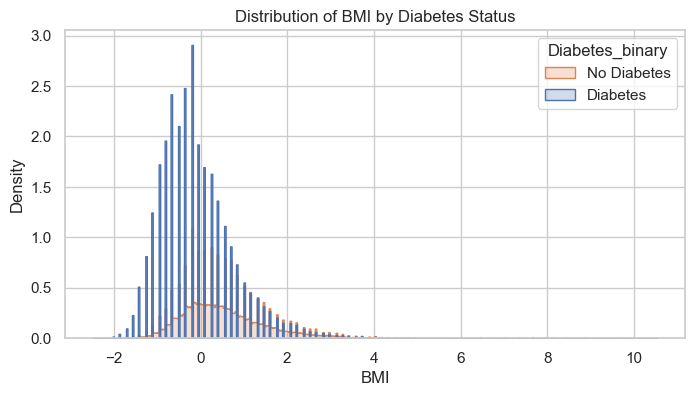

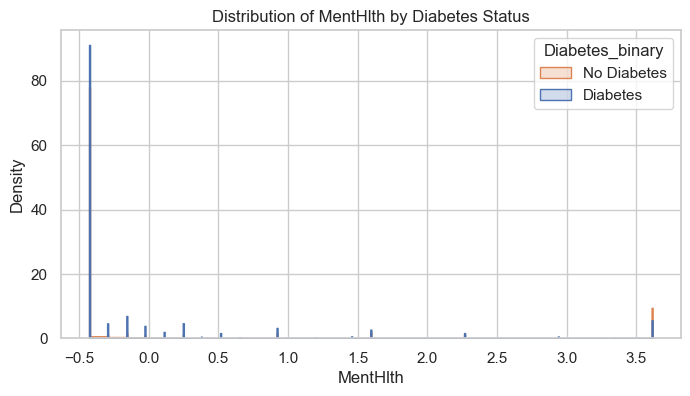

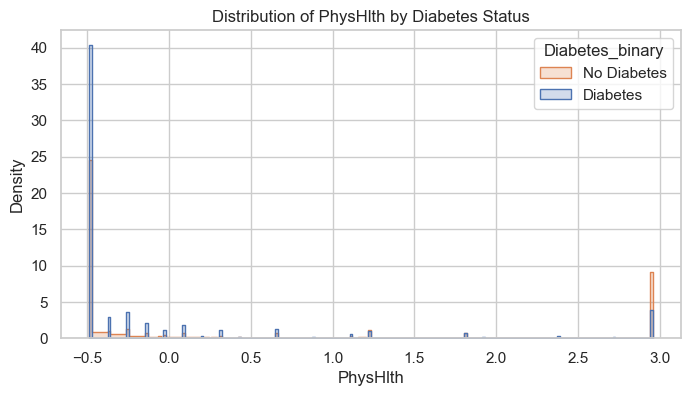

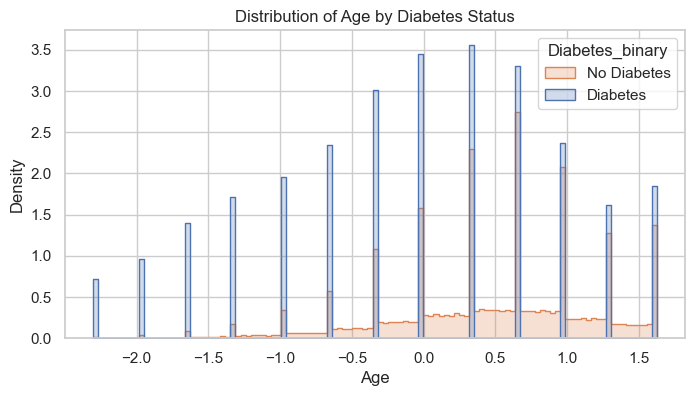

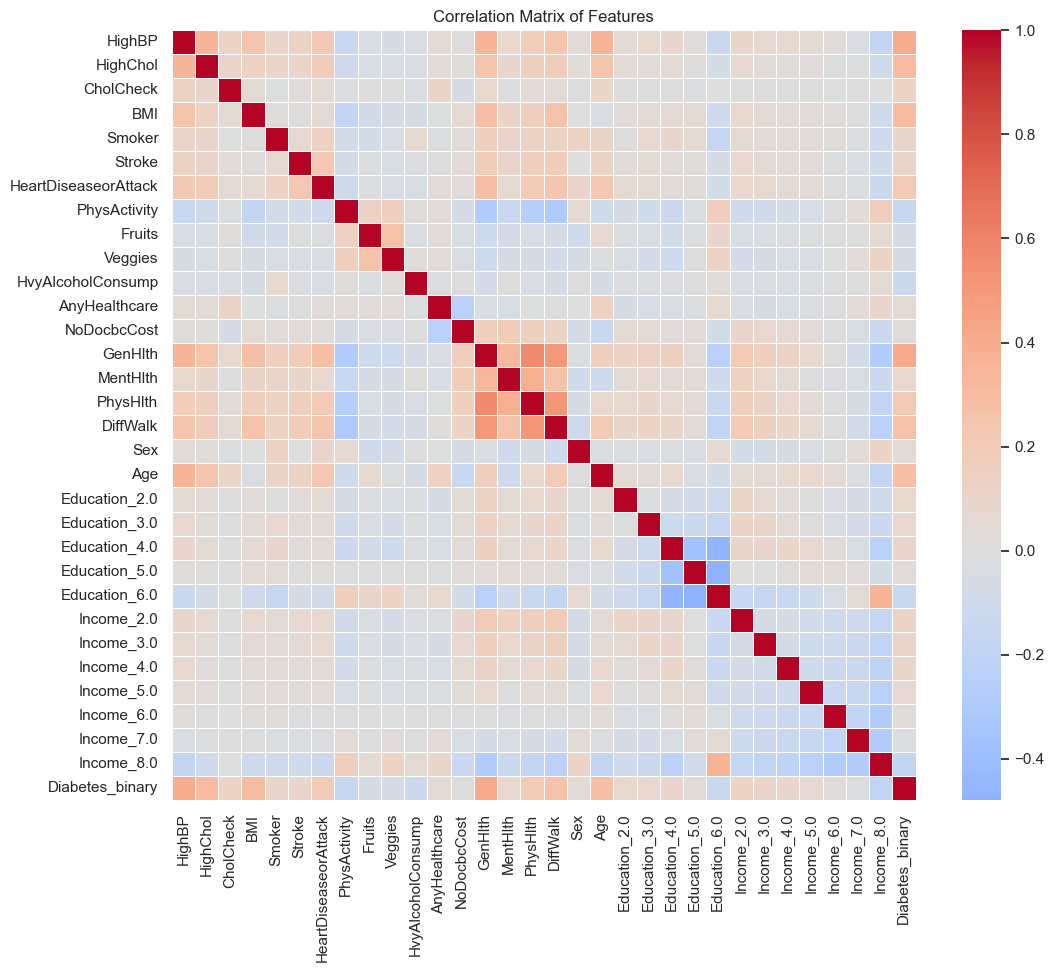


Correlation of each feature with Diabetes_binary:
Diabetes_binary         1.000000
GenHlth                 0.412114
HighBP                  0.403669
HighChol                0.307290
BMI                     0.297732
Age                     0.286749
DiffWalk                0.267914
PhysHlth                0.208974
HeartDiseaseorAttack    0.197317
CholCheck               0.128250
Income_2.0              0.117853
Income_3.0              0.103560
Education_4.0           0.103438
Stroke                  0.102884
Income_4.0              0.090841
Smoker                  0.090522
Education_3.0           0.083304
MentHlth                0.081992
Education_2.0           0.076843
Income_5.0              0.068726
AnyHealthcare           0.052669
Sex                     0.042677
Education_5.0           0.036316
Income_6.0              0.034213
NoDocbcCost             0.014212
Income_7.0             -0.015204
Veggies                -0.052027
Fruits                 -0.053126
HvyAlcoholConsump      -0

In [6]:
# Set a style for the plots
sns.set(style="whitegrid")

# 1. Visualize the Distribution of Key Continuous Features
# Plot BMI, MentHlth, PhysHlth, and Age distributions, separated by Diabetes_binary
features_to_plot = ['BMI', 'MentHlth', 'PhysHlth', 'Age']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=X_train_balanced, x=feature, hue=y_train_balanced, element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {feature} by Diabetes Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title="Diabetes_binary", labels=["No Diabetes", "Diabetes"])
    plt.show()

# 2. Correlation Analysis
# Combine X_train_balanced and y_train_balanced for correlation analysis
data_balanced = pd.concat([X_train_balanced, y_train_balanced], axis=1)
plt.figure(figsize=(12, 10))
correlation_matrix = data_balanced.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Display correlation of each feature with the target variable
correlation_with_target = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)
print("\nCorrelation of each feature with Diabetes_binary:")
print(correlation_with_target)


In this EDA step, we examine the distribution of key continuous features and analyze feature correlations. First, we visualize the distributions of BMI, MentHlth, PhysHlth, and Age for individuals with and without diabetes using histograms. These plots help us understand whether certain values in these features are more common among individuals with diabetes, revealing potential risk factors. Next, we perform a correlation analysis by calculating the correlation matrix, which shows the strength and direction of relationships between features. We visualize this matrix using a heatmap to easily spot features that are positively or negatively associated with the target variable (Diabetes_binary). Finally, we list features with the highest correlations to Diabetes_binary, helping us identify the most predictive factors for diabetes.


<h3>Step 4: Modeling and Evaluation</h3>

In [8]:
# Initialize models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
# svm_model = SVC(random_state=42, probability=True) Tried using and SVM model but it took too long to load so switchd to gradient boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Dictionary to store models and their names
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    #"SVM": svm_model
    "Gradient Boosting": gradient_boosting_model
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Model Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display results
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.7410320088300221
Precision: 0.31373511722106295
Recall: 0.7231574480124487
F1 Score: 0.4376150323160553
Confusion Matrix:
 [[32485 11182]
 [ 1957  5112]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.74      0.83     43667
         1.0       0.31      0.72      0.44      7069

    accuracy                           0.74     50736
   macro avg       0.63      0.73      0.63     50736
weighted avg       0.86      0.74      0.78     50736


Random Forest Performance:
Accuracy: 0.8492983286029644
Precision: 0.43251461988304096
Recall: 0.2615645777337672
F1 Score: 0.32598730606488013
Confusion Matrix:
 [[41241  2426]
 [ 5220  1849]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.92     43667
         1.0       0.43      0.26      0.33      7069

    accuracy                           0.85     50736
   macro avg

In this modeling step, we train and evaluate three classification models: Logistic Regression, Random Forest, and Gradient Boosting. We initially attempted an SVM model, but it was replaced with Gradient Boosting due to performance constraints. Each model is trained on the balanced training set, which helps reduce bias toward the majority class (no-diabetes). After training, we use each model to predict labels for the test set, which retains the original class distribution to reflect real-world performance. For each model, we calculate several evaluation metrics: accuracy, precision, recall, and F1 score. Additionally, we display the confusion matrix and a detailed classification report to provide insights into each model’s ability to correctly classify both classes, focusing especially on recall (minimizing false negatives) for the positive class (diabetes). This thorough evaluation allows us to compare models and select the one best suited for our goals.

<h3>Model Comparison</h3>

<h5>1. Logistic Regression</h5>

 - Accuracy: 74.1%
 - Precision: 31.4%
 - Recall: 72.3%
 - F1 Score: 43.8%
 - Confusion Matrix:
    - True Negatives (TN): 32,485
    - False Positives (FP): 11,182
    - False Negatives (FN): 1,957
    - True Positives (TP): 5,112
 - Interpretation:
    - Logistic Regression achieved a high recall (72%) for the positive class (diabetes), meaning it identified most diabetes cases but at the cost of a high false-positive rate.
    - This model has the highest recall among the three, which is advantageous for a health-related context where missing positive cases (false negatives) is more critical.

<h5>2. Random Forest</h5>

 - Accuracy: 84.9%
 - Precision: 43.3%
 - Recall: 26.2%
 - F1 Score: 32.6%
 - Confusion Matrix:
    - True Negatives (TN): 41,241
    - False Positives (FP): 2,426
    - False Negatives (FN): 5,220
    - True Positives (TP): 1,849
 - Interpretation:
    - The Random Forest model has a high accuracy (85%) and precision (43%) but lower recall (26%). It’s effective at minimizing false positives but misses a significant number of true diabetes cases (low recall).
    - This model may not be ideal in this case because it prioritizes accuracy over capturing the positive cases, which is less suitable for identifying a health condition.

<h5>3. Gradient Boosting</h5>

 - Accuracy: 83.2%
 - Precision: 41.1%
 - Recall: 47.9%
 - F1 Score: 44.3%
 - Confusion Matrix:
    - True Negatives (TN): 38,808
    - False Positives (FP): 4,859
    - False Negatives (FN): 3,677
    - True Positives (TP): 3,392
 - Interpretation:
    - Gradient Boosting strikes a balance between precision (41.1%) and recall (47.9%). It performs better than Random Forest in capturing positive cases and has a higher F1 score, suggesting a better balance between precision and recall.
    - This model provides a more moderate approach, with a decent recall and precision, making it a strong candidate for identifying diabetes while limiting false positives.

<h5>Summary and Model Choice</h5>
Given the context, the primary goal is to minimize false negatives (i.e., ensure we don’t miss diabetes cases), so recall is a key metric. Here’s the summary:

 - Logistic Regression: Achieves the highest recall (72%) but with lower overall accuracy and high false-positive rates.
 - Random Forest: High accuracy and precision but very low recall, making it less suitable due to many missed diabetes cases.
 - Gradient Boosting: Offers a balanced performance with moderate recall (48%) and accuracy (83%), providing a reasonable trade-off between capturing positive cases and limiting false positives.

<h5>Recommended Model</h5>
Gradient Boosting is recommended as the best model in this case. While it doesn’t reach the high recall of Logistic Regression, it balances recall with a lower rate of false positives, which may make it more effective overall.